In [1]:
from sklearn.datasets import fetch_openml 
import sklearn
import matplotlib.pyplot as plt
from sklearn import neighbors
import numpy as np
from sklearn import model_selection
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
import random as rd
sklearn.__version__

'0.24.2'

In [3]:
mnist = fetch_openml('mnist_784')

In [24]:
xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(mnist.data.values, mnist.target, train_size = 0.7)
clf = MLPClassifier(hidden_layer_sizes = (50)).fit(xtrain,ytrain)

In [27]:
prediction = clf.predict(xtest)
precision = sum([prediction[n] == list(ytest)[n] for n in range(len(prediction))])/len(prediction)
print(f"Precision du modele: {precision}")

Precision du modele: 0.9453809523809524


In [23]:
nb = 3
print(f"Classe de la {nb + 1} ème image: {list(ytest)[nb]}. Classe prédite: {clf.predict([xtest[nb]])}.")

Classe de la 4 ème image: 4. Classe prédite: ['4'].


In [30]:
precision_score(ytest, clf.predict(xtest), average='micro')

0.9453809523809524

In [51]:
xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(mnist.data.values, mnist.target, train_size = 0.7)
debut = 2
fin = 101
pas = 20

precisions = [-1 for i in range(fin - debut)]
for i in range(debut,fin,pas):
    clf = MLPClassifier(hidden_layer_sizes = tuple([50]*(i+1))).fit(xtrain,ytrain)
    print(f"Avancement: {(i-debut+1)/(fin-debut)*100}%")
    precisions[i-debut] = precision_score(ytest, clf.predict(xtest), average='micro')
    
val = [e for e in precisions if e!= -1]
plt.plot(list(range(len(val))),val)
plt.show()

#Au delà d'un certain point, augmenter le nombre de couches réduit la précision du réseau de neuronnes grandement

Avancement: 1.0101010101010102%


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

In [4]:
xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(mnist.data.values, mnist.target, train_size = 0.7)

times = [0,0,0,0,0]
precisions2 = [0,0,0,0,0]
sizes = []

for i in range(5):
    print(f"{i+1}/5")
    start_time = time.time()
    nb_couches_cachées = i * 2 + 1
    hidden_layer_sizes = tuple([rd.randint(10,300) for i in range(nb_couches_cachées)])
    sizes.append(hidden_layer_sizes)
    clf = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes).fit(xtrain,ytrain)
    times[i] = time.time() - start_time
    precisions2[i] = precision_score(ytest, clf.predict(xtest), average='micro')

print(sizes)
print(times)
print(precisions2)

1/5
2/5
3/5
4/5
5/5
[(46,), (111, 130, 171), (113, 79, 273, 224, 226), (176, 258, 289, 254, 81, 28, 225), (90, 175, 24, 43, 165, 263, 23, 42, 143)]
[30.945879697799683, 53.03389620780945, 106.02296996116638, 133.40248084068298, 82.55802726745605]
[0.9469047619047619, 0.9736666666666667, 0.974, 0.978, 0.9758571428571429]


In [30]:
xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(mnist.data.values, mnist.target, train_size = 0.7)

/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (sta

/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (sta

/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (sta

34.06021428108215


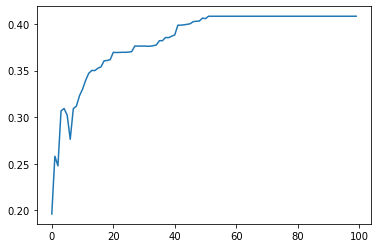

In [31]:
#Convergence de L-BFGS
#Converge mal sur des grand jeux de données, mais peut être aussi voir plus efficace que les deux autres sur des petits jeux de données (environ 100)

clf = MLPClassifier(hidden_layer_sizes=(50,50,50), random_state=0, max_iter=1, warm_start=True, solver='lbfgs')
precisions3 = []
start_time = time.time()
for i in range(100):
    clf.fit(xtrain, ytrain)
    precisions3.append(precision_score(ytest, clf.predict(xtest), average='micro'))
    
plt.plot(precisions3)
print(time.time() - start_time)

/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


29.72205877304077


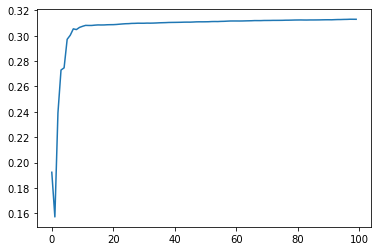

In [34]:
#Convergence de SGD
#Le plus rapide des 3 pour 3 couches et un grand nombre de données
#Se rapproche du premier en terme de précision et de vitesse d'execution au fur et à mesure que le nombre
#de données baisse pour 3 couches, voir devient moins bon pour un training set de 100. La vitesse de convergence reste la meilleure des 3

clf = MLPClassifier(hidden_layer_sizes=(50,50,50), random_state=0, max_iter=1, warm_start=True, solver='sgd')
precisions3 = []
start_time = time.time()

for i in range(100):
    clf.fit(xtrain, ytrain)
    precisions3.append(precision_score(ytest, clf.predict(xtest), average='micro'))
    
plt.plot(precisions3)
print(time.time() - start_time)

/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


30.207062005996704


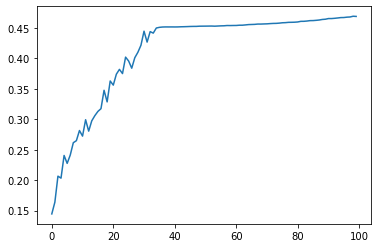

In [33]:
#Convergence de Adam
#Meilleure convergence des 3 avec une seule couche et beaucoup de donnéesou 

clf = MLPClassifier(hidden_layer_sizes=(50,50,50), random_state=0, max_iter=1, warm_start=True, solver='adam')
precisions3 = []
start_time = time.time()

for i in range(100):
    clf.fit(xtrain, ytrain)
    precisions3.append(precision_score(ytest, clf.predict(xtest), average='micro'))
    
plt.plot(precisions3)
print(time.time() - start_time)

Fonction d'activation: identity
Fonction d'activation: logistic
Fonction d'activation: tanh
Fonction d'activation: relu


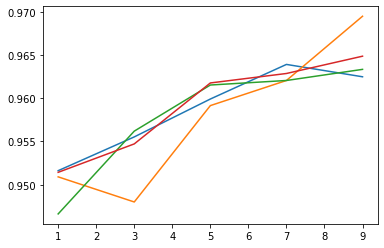

In [35]:
activations = ["identity", "logistic", "tanh", "relu"]
xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(mnist.data.values, mnist.target, train_size = 0.7)
precisions4 = {}

for activation in activations:
    precision4 = []
    for i in range(5):
        hidden_layer_sizes = tuple([50]*(i+1))
        clf = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes).fit(xtrain,ytrain)
        precision4.append(precision_score(ytest, clf.predict(xtest), average='micro'))
    precisions4[activation] = precision4

for e in precisions4:
    print(f"Fonction d'activation: {e}")
    plt.plot([1,3,5,7,9], precisions4[e])
    plt.show()

alpha = 1e-05
Iteration 1, loss = 2.20534520
Iteration 2, loss = 0.52064974
Iteration 3, loss = 0.37653647
Iteration 4, loss = 0.30664521
Iteration 5, loss = 0.26426995
Iteration 6, loss = 0.23549162
Iteration 7, loss = 0.21648162
Iteration 8, loss = 0.18941792
Iteration 9, loss = 0.17231096
Iteration 10, loss = 0.15968793
Iteration 11, loss = 0.15054674
Iteration 12, loss = 0.15079985
Iteration 13, loss = 0.13702716
Iteration 14, loss = 0.13366807
Iteration 15, loss = 0.12646474
Iteration 16, loss = 0.12167581
Iteration 17, loss = 0.11331369
Iteration 18, loss = 0.10607446
Iteration 19, loss = 0.10665608
Iteration 20, loss = 0.10476050
Iteration 21, loss = 0.09768451
Iteration 22, loss = 0.10177724
Iteration 23, loss = 0.09257500
Iteration 24, loss = 0.08879483
Iteration 25, loss = 0.08439008
Iteration 26, loss = 0.08484405
Iteration 27, loss = 0.07737501
Iteration 28, loss = 0.07605630
Iteration 29, loss = 0.07683069
Iteration 30, loss = 0.07146964
Iteration 31, loss = 0.07100075
Ite

Iteration 46, loss = 0.03267949
Iteration 47, loss = 0.02957218
Iteration 48, loss = 0.03232206
Iteration 49, loss = 0.03197718
Iteration 50, loss = 0.03211881
Iteration 51, loss = 0.03367928
Iteration 52, loss = 0.02531285
Iteration 53, loss = 0.02282085
Iteration 54, loss = 0.02942305
Iteration 55, loss = 0.03499436
Iteration 56, loss = 0.03388219
Iteration 57, loss = 0.02157772
Iteration 58, loss = 0.01709076
Iteration 59, loss = 0.02395117
Iteration 60, loss = 0.02383467
Iteration 61, loss = 0.03348922
Iteration 62, loss = 0.02134309
Iteration 63, loss = 0.02205116
Iteration 64, loss = 0.02041617
Iteration 65, loss = 0.02805308
Iteration 66, loss = 0.02665578
Iteration 67, loss = 0.02012287
Iteration 68, loss = 0.02301900
Iteration 69, loss = 0.01895673
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
alpha = 0.01
Iteration 1, loss = 2.56359565
Iteration 2, loss = 0.55086168
Iteration 3, loss = 0.38511729
Iteration 4, loss = 0.30773856
Itera

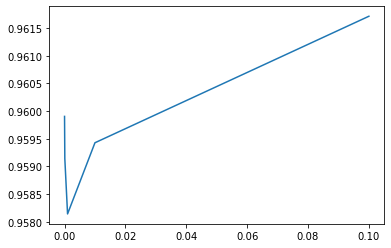

In [39]:
xtrain,  xtest,  ytrain,  ytest = model_selection.train_test_split(mnist.data.values, mnist.target, train_size = 0.7)
precisions5 = []
alphas = [0.00001,0.0001,0.001,0.01,0.1]


for alpha in alphas:
    print(f"alpha = {alpha}")
    hidden_layer_sizes = (50,50,50)
    clf = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, verbose = True).fit(xtrain,ytrain)
    precisions5.append(precision_score(ytest, clf.predict(xtest), average='micro'))



plt.plot(alphas, precisions5)
plt.show()

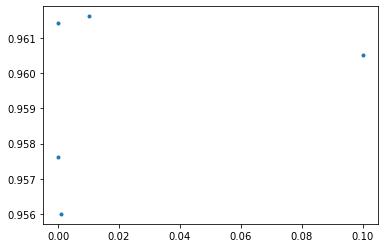

In [38]:
plt.plot(alphas, precisions5, ".")
plt.show()